<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Rasa_NLU_Rasa_Core_Tutorial_Building_a_Simple_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Rasa NLU & Rasa Core Tutorial - Building Chatbots



In [1]:
# How to upload your dataset to colab
from google.colab import files
uploaded = files.upload()

In [0]:
from IPython.display import Image

### Rasa NLU & Rasa Core Tutorials
+ Tabula rasa - blank slate
+ Natural Language Understanding tool for understanding what is being said in short pieces of text
+ 
#### Main Idea
+ Intent Classification ===> rasa_nlu
+ Entity Extraction ===> rasa_nlu
+ Dialogue and Actions ===> rasa_core

#### Installing
- pip install tzlocal==1.5.1
- pip install rasa_core

#### Adding Backend for NLU
- pip install rasa_nlu[spacy]

+ install a language model for the language you need
- python -m spacy download en_core_web_md
- python -m spacy link en_core_web_md en


#### Adding Graphiz for Visualization
apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz

#### Easy way Run on Google Colab 
- Python 3.6 and up

#### CLI Format
###### Training and Building the Model
    - python -m rasa_nlu.train -c nlu_config.yml --data data/nlu_data.md -o models --fixed_model_name nlu --project current --verbose
###### Training the dialogue model
    - python -m rasa_core.train -d domain.yml -s data/stories.md -o models/current/dialogue --epochs 200
###### Runing our bots
    - python -m rasa_core.run -d models/current/dialogue -u models/current/nlu

# Outline
Installation
Writing Stories
Defining a Domain
Training your Dialogue Model
Starting up the bot
Talking to the bot (no NLU)
Part 2: Add natural language understanding
Installing NLU
Language Understanding
Train the Rasa NLU Model
Starting up the bot (with NLU)
Talking to the Bot (with NLU)
Pro Tip: Visualising the Training Data

#### Practice on the Colab
https://colab.research.google.com/github/RasaHQ/rasa_core/blob/master/getting_started.ipynb

In [2]:
# Installation
!pip install rasa_core;

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

     |████████████████████████████████| 215kB 5.2MB/s 
     |████████████████████████████████| 235kB 45.6MB/s 
     |████████████████████████████████| 40kB 9.6MB/s 
     |████████████████████████████████| 92.6MB 1.2MB/s 
     |████████████████████████████████| 1.0MB 33.3MB/s 
     |████████████████████████████████| 327kB 43.3MB/s 
     |████████████████████████████████| 71kB 20.6MB/s 
     |████████████████████████████████| 665kB 50.5MB/s 
     |████████████████████████████████| 112kB 5.7MB/s 
     |████████████████████████████████| 51kB 10.3MB/s 
     |████████████████████████████████| 153kB 19.5MB/s 
     |████████████████████████████████| 5.4MB 10.2MB/s 
     |████████████████████████████████| 61kB 22.1MB/s 
     |████████████████████████████████| 51kB 21.8MB/s 
     |████████████████████████████████| 51kB 20.5MB/s 
     |████████████████████████████████| 368kB 51.1MB/s 
     |████████████████████████████████| 3.2MB 46.3MB/s 
     |████████████████████████████████| 2.3MB 46.5MB/s 
 

#### Writing A Story


### Story Structure
  - starts stories ==> ##
  -  intent/entities of the message you are sending ==> *
  -  actions that the bot will do or take eg utter_greet,utter_location,API_function 
      with dash  -

In [3]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* mood_affirm
  - utter_happy

## good purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_affirm           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_affirm
  - utter_price
* mood_affirm
  - utter_goodbye
  
## good purchase path2
* greet              
  - utter_greet
* inform                    <!-- user utterance, in format intent[entities] -->
  - utter_ask_item
  - utter_show_item
  - utter_did_that_help
* goodbye
    - utter_goodbye

## no purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_deny           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_deny
  - utter_ask_item
* mood_affirm
  - utter_goodbye
  
  
## get weather of location
* greet
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* inform
  - utter_ask_location
* inform{"location": "Paris"}
  - utter_ask_location
* goodbye
    - utter_goodbye
    - export
    
## get weather of location
* greet
    - utter_greet
* inform[location=London]
    - utter_ask_location
* goodbye
    - utter_goodbye
    - export
  
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

"""

%store stories_md > my_stories.md

Writing 'stories_md' (str) to file 'my_stories.md'.


### Defining the Domain Universe/Environment
+ Where(universe or environment) your bot lives
 - - intents : what you expect users to say,their intentions
 - - action : what your bot is supposed to do(list them eg utter_greet,custom actions)
 - - template :

+ Stories

In [4]:
domain_yml = """
intents:
  - greet
  - goodbye
  - mood_affirm
  - mood_deny
  - mood_great
  - mood_unhappy
  - purchase
  - purchase_affirm
  - purchase_deny
  - inform
  - weather
  
entities:
 - location
 - money
 
slots:
 location:
   type: text


actions:
- utter_greet
- utter_cheer_up
- utter_purchase
- utter_price
- utter_did_that_help
- utter_ask_item
- utter_show_item
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_location

templates:
  utter_greet:
  - text: "Hey! How are you?"
  - text: "Hi How are you?"
  - text: "What's up"
  - text: "Bonjour"

  utter_cheer_up:
  - text: "Stay motivated,all is well"
  - text: "Here is something to make you happy"
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  - text: "How do you mean? Can you clarify "
  - text: "Not quite sure what you want. "
  
  utter_happy:
  - text: "Great carry on!" 
  
  utter_purchase:
  - text: 'What item do you want to buy?'
  - text: 'Here are some recommended products'
  - text: 'You want to buy this?'
  - text: 'We only have this?'
  - text: 'Can you give me the specs ?'
  
  utter_ask_item:
  - text: 'What item do you want to buy?'
  - text: 'How many do you want to buy?'
  - text: 'Which type?'

  utter_show_item:
  - text: "Here are some suggestions."
  - text: "Check this one out."
  - text: "We only have this product"
  - text: "Sending sample picture"
    
  utter_price:
  - text: "It will cost you this much"
  - text: "The price is 100"
  - text: "You will pay"
  - text: "Here is the bill"
  - text: "The total cost is 2000, you can pay with your credit card."

  utter_ask_location:
  - text:'In what location?'
  - text:'In which place?'
  - text:'Where precisely?'

  utter_goodbye:
  - text: "Bye"
  - text: "Talk to you later"
  - text: "Cu"
  - text: "Aurevoir"
  - text: "A bientot "
  - text: "goodbye"
  - text: "have a nice day"
  - text: "see you around"
  - text: "bye bye"
  - text: "See you later"
  
"""

%store domain_yml > my_domain.yml

Writing 'domain_yml' (str) to file 'my_domain.yml'.


#### Training your Dialogue Model
+ rasa_core
+ Using Keras
+ Install keras + tensorflow backend

In [9]:
# Load the packages without using fallbackpolicy
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

TypeError: ignored

In [8]:
# Set the Agent
agent = Agent('my_domain.yml', policies=[KerasPolicy()])

NameError: ignored

In [6]:
# loading our neatly defined training dialogues
training_data = agent.load_data('my_stories.md')
agent.train(
        training_data,
        validation_split=0.0,
        epochs=400
)

NameError: ignored

In [7]:
# Saving Our Dialogue Models
agent.persist('models/dialogue')

NameError: ignored

#### Starting up the bot
+ rasa_core
+ agent
+ dialogue model

The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)

In [0]:
# Load Dialogue model into agent
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue')

# With NLU Trained data
# agent = Agent.load('models/dialogue', interpreter=model_directory)

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)


#### Practising or Talking to the bot

In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
Hi
Great carry on!
It working
I am not sure what you are aiming for.
I want to buy a phone
Great carry on!
I need a phone
I am not sure what you are aiming for.
what is the weather?
Great carry on!
stop


In [0]:
## Training Our Bot with Rasa NLU

### Natural Language Understanding and Intent Classification

In [0]:
# Loading our Packages
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

#### How our dataset can look like
+ Describes what the messages mean/intention
+ json
+ md
+ yml




In [0]:
## intent:intentname
- examples
- examples

In [0]:
# Data Set
nludataset_md = """
## intent:greet
- hey
- hello
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad

## intent:purchase
- I need to buy IPhone
- I want to purchase some items
- What product is that?
- You need this watch.
- How much that it cost?
- He bought this house for $2000
- She is selling it
- I need to buy another
- Can you make a request for the product
- How much?
- This is so expensive
- It was very cheap
- He is buying 
- You ordered for this
- buy
- sell
- pay
- purchase
- what is the price
- Tell me the price
- Show me the product

## intent:purchase_affirm
- yes
- yes I need to buy it
- indeed I want to buy
- of course
- that sounds good
- correct
- I will take it

## intent:purchase_deny
- no I don't want it
- never
- I don't think so
- don't like that
- no way 
- not really
- no


## intent:inform
- I need to buy IPhone
- I want to purchase some items
- What product is that?

## intent:weather
- I wonder what is the weather in Vilnius right now?
- what is the weather?
- Tell me the weather
- Is the weather nice in Barcelona today
- I am going to London today and I wonder what is the weather out there?
- Show me the weather in Dublin, please
- Tell me the weather in Vilnius

"""

%store nludataset_md > nludataset.md

Writing 'nludataset_md' (str) to file 'nludataset.md'.


In [0]:
# Loading Dataset
# Dataset can be in json or md
training_data = load_data('nludataset.md')


INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'mood_great', 'mood_unhappy', 'greet', 'purchase', 'purchase_deny', 'goodbye', 'purchase_affirm', 'inform', 'mood_deny', 'weather', 'mood_affirm'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [0]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz;
!pip install rasa_nlu[spacy];
!python -m spacy download en;

#### Configuration File
+ spacy as backend
+ mitie as backend

In [0]:
# Load the Rasa_nlu Packages
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer



#### Load and Configure our Backend with spaCy

In [0]:

training_data = load_data('nludataset.md')
pipeline = [{"name": "nlp_spacy"}, 
            {"name": "tokenizer_spacy"}, 
            {"name": "intent_featurizer_spacy"},  
            {"name": "intent_classifier_sklearn"}]


INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'mood_great', 'mood_unhappy', 'greet', 'purchase', 'purchase_deny', 'goodbye', 'purchase_affirm', 'inform', 'mood_deny', 'weather', 'mood_affirm'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [0]:
trainer = Trainer(RasaNLUModelConfig({"pipeline": pipeline}))
interpreter = trainer.train(training_data)
model_directory = trainer.persist('./projects/default/')

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_classifier_sklearn


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/content/projects/default/default/model_20180725-072726'


In [0]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


 #### Lets Chat

In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
Hi
Hey! How are you?
Good
Great carry on!
I need a phone
text:'In what location?'
London
You want to buy this?
yes
Hi How are you?
Good
Great carry on!
I need a Iphone
text:'In which place?'
Paris
We only have this?
how much
Here is something to cheer you up:
Image: https://i.imgur.com/nGF1K8f.jpg
Did that help you?
no
Great carry on!
I need to buy IPhone
Great carry on!
I need another
A bientot 
What product is that
How many do you want to buy?
12
Talk to you later
i need a phone
Great carry on!
I need a new phone
How do you mean? Can you clarify 
In Iphone
What item do you want to buy?
Iphone 6
Bye
stop


In [0]:
import platform
platform.python_version()

## Intent Classification With Rasa_nlu

In [0]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

In [0]:
# Loading our Dataset
# Dataset can be in json,md
training_data = load_data('nludataset.md')

In [0]:
# Setting Up our Training Configuration with Spacy as Backend
trainer = Trainer(config.load("config_spacy.yml"))


In [0]:
# Model Building
model_directory = trainer.persist('./projects/default/')

In [0]:
# Prediction
from rasa_nlu.model import Metadata, Interpreter

In [0]:
# where `model_directory points to the folder the model is persisted in
interpreter = Interpreter.load(model_directory)

In [0]:
# Predicting
interpreter.parse(u"I am looking for an African spot to eat")

In [0]:
interpreter.parse(u"Good morning everyone")

### Rasa GUI 
##### Online
+ https://rasahq.github.io/rasa-nlu-trainer/
##### Offline
+ npm i -g rasa-nlu-trainer


#### Building your dataset
+ rasa-nlu-trainer gui
 - - Requirement
  - - - nodejs npm + browser(Chrome)
  - - - - + npm install -g rasa-nlu-trainer
  - - - fileformat in json
+ DIY

#### Basic Format of the Dataset.Json
###### Most Basic Format 
{
  "rasa_nlu_data": {}
}


#### Simple Format
{
  "rasa_nlu_data": {
    "common_examples": []
  }
}

#### Evaluating Model

In [0]:
# Import from rasa_nlu
from rasa_nlu.evaluate import run_evaluation

run_evaluation("sampledatasetrasa.json", model_directory)

#### Adding Custom API functions

In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet

import requests
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import unicode_literals

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        dispatcher.utter_message("looking for a good img")
        url = "https://picsum.photos/200/300/?random"
        return [SlotSet("img_api_response", url)]
    
class ActionWeather(Action):
    def name(self):
        return 'action_weather'

    def run(self, dispatcher, tracker, domain):
        from apixu.client import ApixuClient
        api_key = '...' #your apixu key
        client = ApixuClient(api_key)
        
        loc = tracker.get_slot('location')
        current = client.getCurrentWeather(q=loc)
        
        country = current['location']['country']
        city = current['location']['name']
        condition = current['current']['condition']['text']
        temperature_c = current['current']['temp_c']
        humidity = current['current']['humidity']
        wind_mph = current['current']['wind_mph']

        response = """It is currently {} in {} at the moment. The temperature is {} degrees, the humidity is {}% and the wind speed is {} mph.""".format(condition, city, temperature_c, humidity, wind_mph)
        dispatcher.utter_message(response)
        return [SlotSet('location',loc)]


### Visualizing The Dialogue

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 5/5 [00:00<00:00, 175.29it/s, # trackers=1]


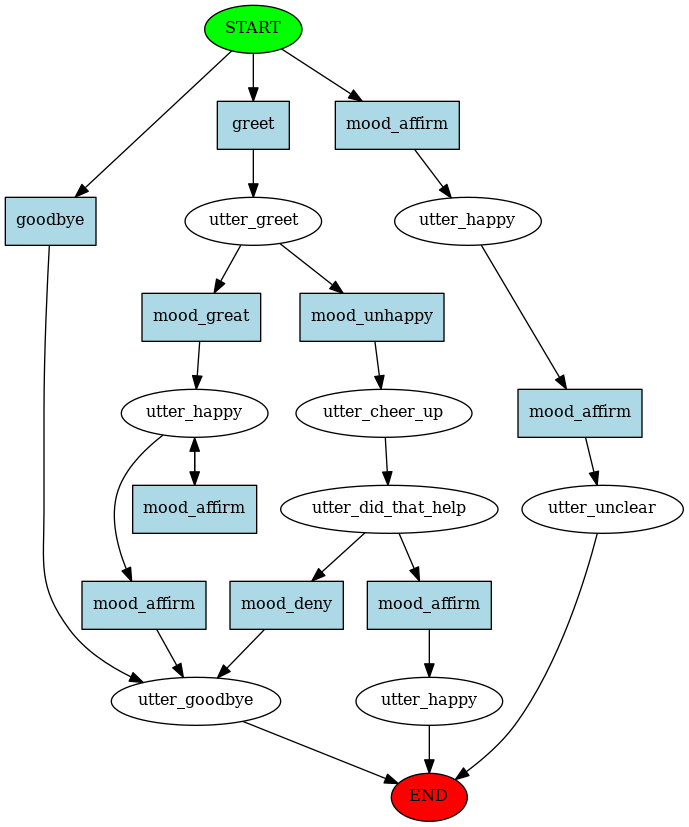

In [0]:
from rasa_core.agent import Agent
from IPython.display import Image

agent = Agent.load('models/dialogue')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

In [0]:
### Jesse JCharis
# J-Security
# Jesus Saves @JCharisTech